# Exercise Sheet 3

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [3]:
G = nx.read_edgelist('../ex2/grid/adj', comments = '%', nodetype=int)

## Exercise 4

### 4.1

In [4]:
degrees = [val for (node, val) in G.degree()] 
avg_deg = np.mean(degrees)
avg_deg

2.66909532483303

### 4.2

In [5]:
import random

2.655


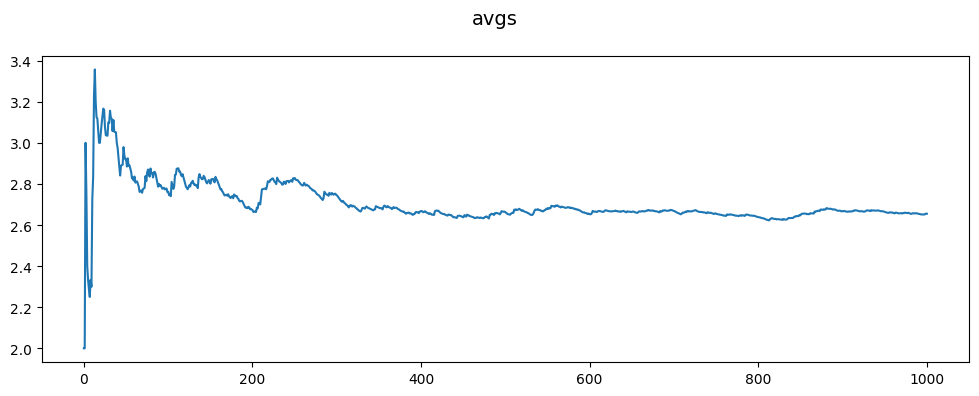

In [6]:
k = 1000
N = G.number_of_nodes()
rands = np.random.randint(N, size=k)

sum = 0
avgs = np.zeros(k)
degress = G.degree()

for i in range(k):
    sum += degrees[rands[i]]
    avgs[i] = sum / (i+1)

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
fig.suptitle("avgs", fontsize=14)
fig.tight_layout()
ax1.plot(np.linspace(0,k,num=k), avgs)
    

print(avgs[-1])

### 4.3

In [7]:
k = 1000
N = G.number_of_nodes()
rands = np.random.randint(N, size=k)

sum = 0
avgs_2 = np.zeros(k)
degress = G.degree()

for i in range(k):
    v = rands[i]
    neighs = list(G.neighbors(v))
    rand = random.randint(0, len(neighs)-1)
    sum += degrees[neighs[rand]]
    avgs_2[i] = sum / (i+1)
    
    
print(avgs_2[-1])

2.67


### 4.4


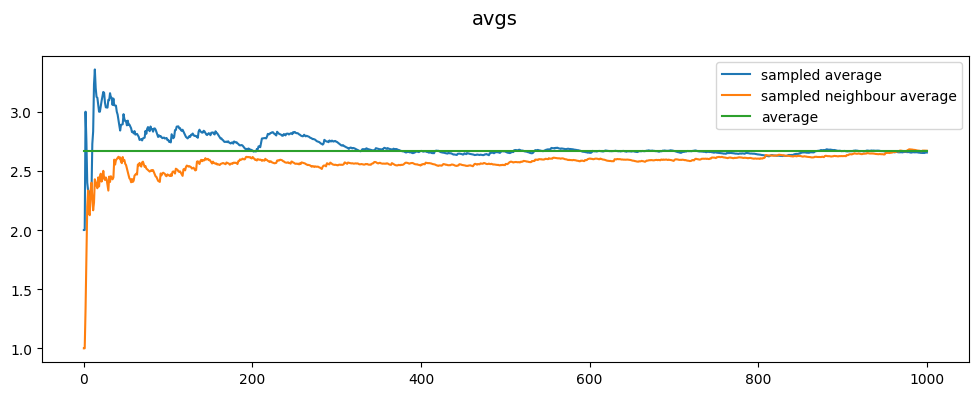

In [16]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
fig.suptitle("avgs", fontsize=14)
fig.tight_layout()
ax1.plot(np.linspace(0,k,num=k), avgs)
ax1.plot(np.linspace(0,k,num=k), avgs_2)
ax1.plot([0, 1000], [avg_deg, avg_deg])
ax1.legend(['sampled average', 'sampled neighbour average', 'average'])

### 4.5


In [22]:
def deg_corr_pairs(G):
    degrees = G.degree()
    n = G.number_of_nodes()
    m = G.number_of_edges()
    r_divisor = 0
    r_dividend = 0
    for i in range(n):
        for j in range(n):
            k_i = degrees[i+1]
            k_j = degrees[j+1]
            A_ij = int(G.has_edge(i, j))
            k_d = int(i == j)
            kk = k_i * k_j
            r_divisor += (A_ij - kk / (2*m)) * kk
            r_dividend += (k_i * k_d - kk / (2*m)) * kk
    print(r_divisor, r_dividend)
    return r_divisor / r_dividend

In [34]:
def deg_corr_edges(G):
    degrees = np.array(list(G.degree()))[:,1]
    n = G.number_of_nodes()
    m = G.number_of_edges()
    
    kk = np.outer(degrees,degrees)
    A = np.array(nx.adjacency_matrix(G).todense())
    print(A)

    s_e = 2 * np.sum(kk * A)
    s_1 = np.sum(degrees)
    s_2 = np.sum(degrees * degrees)
    s_3 = np.sum(degrees * degrees * degrees)
    print(s_e, s_1, s_2, s_3)
    r = (s_e * s_1 - s_2**2) / (s_3 * s_1 - s_2**2)
    
    return r

In [23]:
print(deg_corr_pairs(G))

-83780.62329258585 85443.37670635217
-0.9805397038616488


In [35]:
print(deg_corr_edges(G))

[[0 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]
395876 13188 51054 283086
2.320055507496725


/tmp/ipykernel_6812/3992706231.py:7: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = np.array(nx.adjacency_matrix(G).todense())
